### curriculum - 【AIコース】強化学習　入門編2 DeeplearningとQ-learning

In [1]:
from __future__ import division
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make("FrozenLake-v0")

In [2]:
# テキスト
'''
tf.reset_default_graph()
input_state = tf.placeholder(shape = [1, env.observation_space.n], dtype = tf.float32)
W = tf.Variable(tf.random_uniform([env.observation_space.n, 4], 0, 0.01))
Qout = tf.matmul(input_state, W)
action = tf.argmax(Qout, 1)
'''

'\ntf.reset_default_graph()\ninput_state = tf.placeholder(shape = [1, env.observation_space.n], dtype = tf.float32)\nW = tf.Variable(tf.random_uniform([env.observation_space.n, 4], 0, 0.01))\nQout = tf.matmul(input_state, W)\naction = tf.argmax(Qout, 1)\n'

In [3]:
# 小課題
tf.reset_default_graph()
input_state = tf.placeholder(shape = [1, env.observation_space.n], dtype = tf.float32)
W =  tf.Variable(tf.random_uniform([env.observation_space.n, 4], 0, 0.01))
b =  tf.Variable(tf.random_uniform([4], 0, 0.01))
W2 = tf.Variable(tf.random_uniform([4, 4], 0, 0.01))
b2 = tf.Variable(tf.random_uniform([4], 0, 0.01))
W3 = tf.Variable(tf.random_uniform([4, 4], 0, 0.01))
b3 = tf.Variable(tf.random_uniform([4], 0, 0.01))

H = tf.matmul(input_state, W) + b
H = tf.nn.relu(H)
H = tf.matmul(H, W2) + b2
H = tf.nn.relu(H)
Qout =   tf.matmul(H, W3) + b3
action = tf.argmax(Qout, 1)

In [4]:
nextQ = tf.placeholder(shape = [1, 4], dtype = tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
updateModel = trainer.minimize(loss)

In [5]:
init = tf.global_variables_initializer()

gamma = .99
epsilon = 0.1
num_episodes = 2000

jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        
        while j < 99:
            j += 1
            a, allQ = sess.run([action, Qout], 
                               feed_dict = {input_state: np.identity(16)[s: s + 1]})
            if np.random.rand(1) < epsilon:
                a[0] = env.action_space.sample()
            s1, r, d, _ = env.step(a[0])
            Q1 = sess.run(Qout,
                          feed_dict = {input_state: np.identity(16)[s1: s1 + 1]})
            targetQ = allQ
            targetQ[0, a[0]] = r + gamma * np.max(Q1)
            _, W1 = sess.run([updateModel, W], 
                             feed_dict = {input_state: np.identity(16)[s: s + 1], 
                                          nextQ: targetQ})
            rAll += r
            s = s1
            if d == True:
                epsilon = 1. / ((i / 50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of successful episodes: " + str(sum(rList) / num_episodes) + "%")

Percent of successful episodes: 0.03%


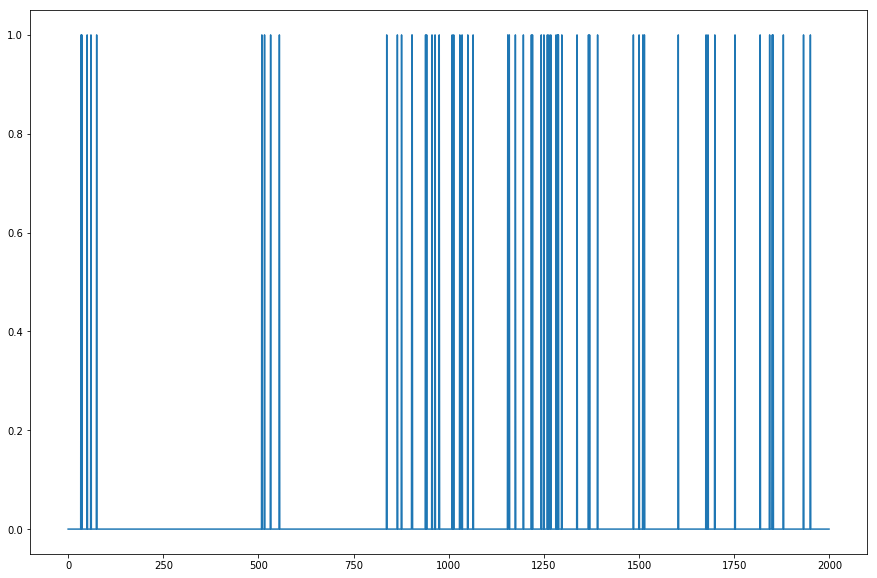

In [6]:
plt.figure(figsize = (15, 10))
plt.plot(rList)

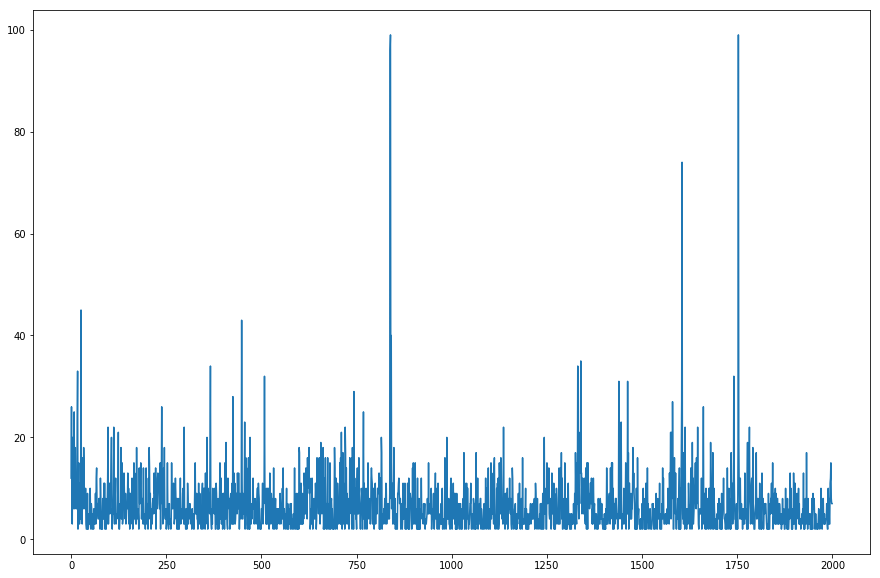

In [7]:
plt.figure(figsize = (15, 10))
plt.plot(jList)